In [2]:
from importlib import reload  # Python 3.4+

import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

from tqdm import tqdm
from timeit import default_timer as timer
import itertools

### Load results

In [54]:
f_name = "verified data/sparseT100.pkl" #verified data/semT1000.pkl"
with open(f_name, 'rb') as f:
    results = pickle.load(f)
print(results)
# print(data);

{'exh': {'mse': [], 'emse': [], 'shd': []}, 'rw_1': {'mse': [], 'emse': [], 'shd': []}, 'rw_2': {'mse': [4.744304090589909, 4.708760335339602, 5.095678450830485, 4.873587900494875, 4.637880790270338, 4.5782598055483765, 4.6527370650214515, 4.691931721084726, 5.200342238085607, 4.873538732651325, 11.141530433910347, 10.054640467343281, 11.276768590730084, 11.274201262575552, 9.585252700761382, 9.714278831173957, 9.866537637721933, 11.66151796757934, 11.092983338491393, 11.006931413895169, 15.826983180421454, 16.959701491255597, 16.838286841747024, 17.3812892919897, 18.751188915932712, 16.653983109285612, 16.241912076899784, 17.018927434695456, 19.62496565826007, 16.88097780712076, 27.63088919217618, 29.565715037693504, 30.857485700591106, 30.46477218135596, 26.67938284567261, 30.866230196558632, 29.1060806894853, 30.346623229352726, 29.49586434041244, 31.207738078785518, 58.51194408363758, 56.85092675960112, 57.999083147717485, 57.35230487161203, 53.02407064156439, 58.384540071275175, 5

### Save results

In [128]:
# from datetime import datetime

# a_file = open(f"{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}cyclicT100.pkl", "wb")
# pickle.dump(results, a_file)
# a_file.close()

### Print results

In [126]:
# print(results['dagols'])
# print(results_2['dagols'])

# results['dagols'] = results_2['dagols']

In [55]:
for method in results:
    if len(results[method]['mse']) >= 0:
        print(method)
        for metric in results[method]:
            print(metric, end = "\t")
            print([np.round(np.mean(results[method][metric][10*i:10*i + 10]), 2) for i in range(6)])
        print()

exh
mse	[nan, nan, nan, nan, nan, nan]
emse	[nan, nan, nan, nan, nan, nan]
shd	[nan, nan, nan, nan, nan, nan]

rw_1
mse	[nan, nan, nan, nan, nan, nan]
emse	[nan, nan, nan, nan, nan, nan]
shd	[nan, nan, nan, nan, nan, nan]

rw_2
mse	[4.81, 10.67, 17.22, 29.62, 57.53, nan]
emse	[5.26, 12.7, 20.85, 41.3, 109.7, nan]
shd	[0.3, 5.4, 11.2, 29.5, 97.5, nan]

mcmc_r
mse	[4.81, 10.74, 16.95, 30.06, 58.18, nan]
emse	[5.26, 12.47, 20.85, 41.28, 109.54, nan]
shd	[0.3, 5.2, 11.2, 30.6, 99.6, nan]

mcmc_t
mse	[nan, nan, nan, nan, nan, nan]
emse	[nan, nan, nan, nan, nan, nan]
shd	[nan, nan, nan, nan, nan, nan]

mcmc_s
mse	[nan, nan, nan, nan, nan, nan]
emse	[nan, nan, nan, nan, nan, nan]
shd	[nan, nan, nan, nan, nan, nan]

mcmc_g
mse	[4.91, 9.64, 14.0, 21.47, 38.03, nan]
emse	[5.38, 11.41, 17.02, 28.95, 68.01, nan]
shd	[0.7, 2.3, 2.4, 6.1, 33.2, nan]

notears
mse	[4.81, 9.18, 13.46, 20.89, 34.79, nan]
emse	[5.26, 10.59, 16.08, 27.08, 61.03, nan]
shd	[0.3, 0.4, 0.7, 1.9, 20.0, nan]

daglasso
mse	[10.7

### Plot results

In [42]:
import matplotlib

# matplotlib.use("pgf")
matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
    'font.size': 14
})

# matplotlib.rcParams['axes.unicode_minus'] = False

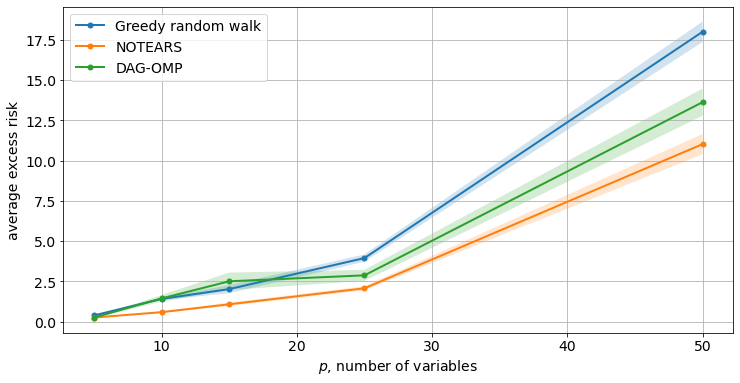

In [66]:
plt.figure(figsize = (12, 6))
plt.xlabel("$p$, number of variables")

p_range = [5, 10, 15, 25, 50]
plt.grid()
# plt.ylabel("average empirical risk " + r"$R_{\mathrm{emp}}(W)$")
plt.ylabel("average excess risk")
# plt.ylabel("average SHD")

def plot_results(method, metric, results, method_name, linestyle = '-'):
    # plot mean and standard error of DAG-OMP as a function of p.
    plt.plot(p_range, [np.mean(results[method][metric][10*i:10*i + 10]) - 1 * p_range[i] for i in range(5)], marker = 'o', markersize = 5, linewidth = 2, label = method_name, linestyle = linestyle)
    plt.fill_between(p_range, [np.mean(results[method][metric][10*i:10*i + 10]) - 1 * p_range[i] - 0.5 * sem(results[method][metric][10*i:10*i + 10])for i in range(5)], [np.mean(results[method][metric][10*i:10*i + 10]) - 1 * p_range[i] + 0.5 * sem(results[method][metric][10*i:10*i + 10])for i in range(5)], alpha = 0.2)

metric = "emse"

# plot_results("rw_2", metric, results, "Random Walk")
# plot_results("mcmc_r", metric, results, "MH-R")
plot_results("mcmc_g", metric, results, "Greedy random walk")

plot_results("notears", metric, results, "NOTEARS")
plot_results("dagomp", metric, results, "DAG-OMP")
# plot_results("dagols", metric, results, "DAG-OLS-V")

# plot_results("daglasso", metric, results, "DAG-LASSO") # yields too large error


plt.legend() #ncol = 6, loc = 'upper left', bbox_to_anchor=(-0.025, 1.2), columnspacing = 0.75, handletextpad = 0.25)
# plt.savefig("sparseT1000shd2.pgf", bbox_inches = 'tight')